In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

### Reading data

There are many different geospatial file format, such as shapefile, GeoJSON, KML, and GPKG

- shapefile is the most common file type that you'll encounter
- all of these file tpyes can be quickly loaded with the gpd.read_file() function

In [3]:
data_dir = os.path.join('/', 'Users', 'yjkim', 'data', 'spatial')
full_data = gpd.read_file(os.path.join(data_dir, 'DEC_lands', 'DEC_lands', 'DEC_lands.shp'))

In [4]:
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


### Prerequisites

In [5]:
full_data.columns = [col.lower() for col in full_data.columns]

In [6]:
data = full_data[['class', 'county', 'geometry']].copy()

In [7]:
data['class'].value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: class, dtype: int64

In [8]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data['class'].isin(['WILD FOREST', 'WILDERNESS'])]
wild_lands.head()

,class,county,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


### Create map

<AxesSubplot:>

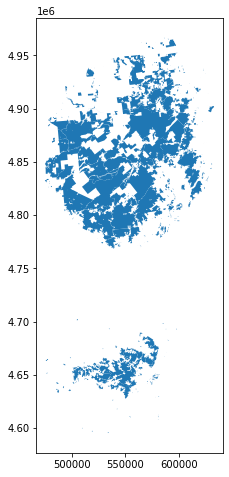

In [9]:
wild_lands.plot(figsize=(8, 8))

In [10]:
# View the first five entries in the "geometry" column
wild_lands['geometry'].head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [12]:
# Campsites in New York state (Point)
POI_data = gpd.read_file(os.path.join(data_dir, 'DEC_pointsinterest', 
                                      'DEC_pointsinterest', 'Decptsofinterest.shp'))
campsites = POI_data.loc[POI_data['ASSET'] == 'PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file(os.path.join(data_dir, 'DEC_roadstrails', 'DEC_roadstrails',
                                          'Decroadstrails.shp'))
trails = roads_trails.loc[roads_trails['ASSET'] == 'FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file(os.path.join(data_dir, 'NY_county_boundaries', 'NY_county_boundaries',
                                      'NY_county_boundaries.shp'))

<AxesSubplot:>

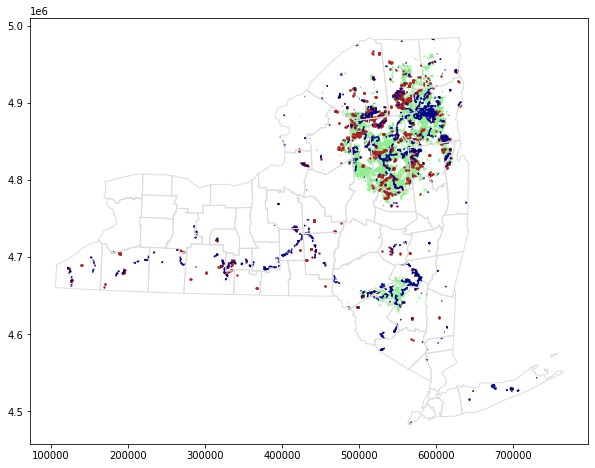

In [13]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10, 10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='firebrick', markersize=2, ax=ax)
trails.plot(color='darkblue', markersize=1, ax=ax)